In [1]:
import numpy as np
import pandas as pd
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('heart_disease_clean.csv')
df.drop(df.columns[0],axis=1,inplace=True) 
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_indeced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/dl,normal,150,No,2.3,upsloping,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/dl,ST-T wave abnormality,187,No,3.5,upsloping,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/dl,normal,172,No,1.4,downsloping,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/dl,ST-T wave abnormality,178,No,0.8,downsloping,0,fixed defect,1
4,57,female,Unknown,120,354,lower than 120mg/dl,ST-T wave abnormality,163,Yes,0.6,downsloping,0,fixed defect,1


In [3]:
CatAttribs = df.select_dtypes(include='object').columns
NumAttribs = df.select_dtypes(include=np.number).columns[:-1]
print("Category columns' Name are: {}".format(CatAttribs))
print("Numerical columns' Name are: {}".format(NumAttribs))

Category columns' Name are: Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_indeced_angina', 'ST_slope', 'thalassemia'],
      dtype='object')
Numerical columns' Name are: Index(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate',
       'ST_depression', 'num_major_vessels'],
      dtype='object')


In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
for col in NumAttribs:
    scaled = RobustScaler().fit_transform(df[[col]].values)
    df[col]= scaled

In [5]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_indeced_angina_Yes,ST_slope_flat,ST_slope_upsloping,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
0,0.592593,0.75,-0.110236,-0.092308,0.9375,0.0,1,1,0,1,0,0,0,1,0,0,1,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,0.0,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0.0,1,0,0,0,1,1,0,1,0,0,0,0,0,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0.0,1,1,0,0,1,1,0,0,0,0,0,0,0,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='YlGn'):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,size=15)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,size=12)
    plt.yticks(tick_marks, classes,size=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",size=12)

    plt.tight_layout()
    plt.ylabel('True label',size=12)
    plt.xlabel('Predicted label',size=12)

In [7]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import precision_score,recall_score,f1_score,jaccard_similarity_score,log_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, average_precision_score

from sklearn.model_selection import cross_val_predict,cross_val_score

def score_P(model, Class0Name,Class1Name,name):
    """
    score in test set
    Class0Name: reality name for class 0
    """
    
    font = 12
    print('\n Scores on Test Set')
    print(classification_report(y_test,model.predict(X_test)))
    
    if name in ['LogisticRegression','SVC','SGDClassifier','DecisionTreeClassifier',
                'KNeighborsClassifier','RandomForestClassifier','VotingClassifier']:
        y_pred_P = model.predict_proba(X_test)[:,1]
    else:
        y_pred_P = model.decision_function(X_test)     
    
    precisions, recalls, thresholds = precision_recall_curve(y_test,y_pred_P)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_P)
    
    # Plot PRC and ROC

    plt.figure(figsize=(14,5))
    plt.subplot(141);plt.plot(recalls,precisions,'b--',label = 'PRC');
    plt.fill_between(recalls,precisions, step='post', alpha=0.2,
                 color='#FAFAD2');
    plt.xlabel('Recall',size=font);plt.ylabel('Precision',size=font);
    plt.title('Precision-Recall curve: \n Average Precision-Recall \n Score ={0:0.3f}'
              .format(average_precision_score(y_test,y_pred_P)), fontsize=16);
    plt.legend(loc='best');plt.ylim([0,1.1]);plt.xlim([0,1])
    
    plt.subplot(142);plt.plot(fpr,tpr,'r--',label = 'ROC');
    plt.fill_between(fpr,tpr, step='post', alpha=0.2,color='#FAFAD2');
    plt.xlabel('False Positive Rate',size=font);plt.ylabel('True Positive Rate',size=font);
    plt.title('ROC curve: \n Area Under ROC \n is   ={0:0.3f}'
              .format(roc_auc_score(y_test,y_pred_P)), fontsize=16);
    plt.legend(loc='best');plt.ylim([0,1.1]);plt.xlim([0,1])     

    conf_mx1 = confusion_matrix(y_train,model.predict(X_train))
    plt.subplot(143);
    plot_confusion_matrix(conf_mx1, classes=[Class0Name,Class1Name],
                          title='Train Set \n Confusion matrix ')
    
    conf_mx2 = confusion_matrix(y_test,model.predict(X_test))
    plt.subplot(144);
    plot_confusion_matrix(conf_mx2, classes=[Class0Name,Class1Name],
                         title='Test Set \n Confusion matrix')

In [8]:
def gridSearchCVReport():
    print("Grid Search with ROC AUC")
    print("\n Train Set ")
    print("Best parameters on Train set:", grid.best_params_)
    print("Best Cross-Validation score (AUC) on Train set:", grid.best_score_)
    print("\n Test Set")    
    print("Test set AUC:", roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test)[:,1])) 
    print("Test set accuracy:", grid.best_estimator_.score(X_test, y_test))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('target',1), df['target'], 
                                                    test_size = 0.2, random_state = 42)

# Voting
- Voting classifier often achieves a higher accuracy than the best classifier in the ensemble. Even if the each classifier is a *weak learner*, the ensemble can still be a *strong learner*.
- **soft voting** can predict the class with the highest class probability, averaged over all the individual classifiers. One thing need to ensure is that all classifiers can estimate class probabilities.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)

Grid Search with ROC AUC

 Train Set 
Best parameters on Train set: {'penalty': 'l1'}
Best Cross-Validation score (AUC) on Train set: 0.869204097428199

 Test Set
Test set AUC: 0.9450431034482759
Test set accuracy: 0.8032786885245902

 Scores on Test Set
             precision    recall  f1-score   support

          0       0.72      0.97      0.82        29
          1       0.95      0.66      0.78        32

avg / total       0.84      0.80      0.80        61



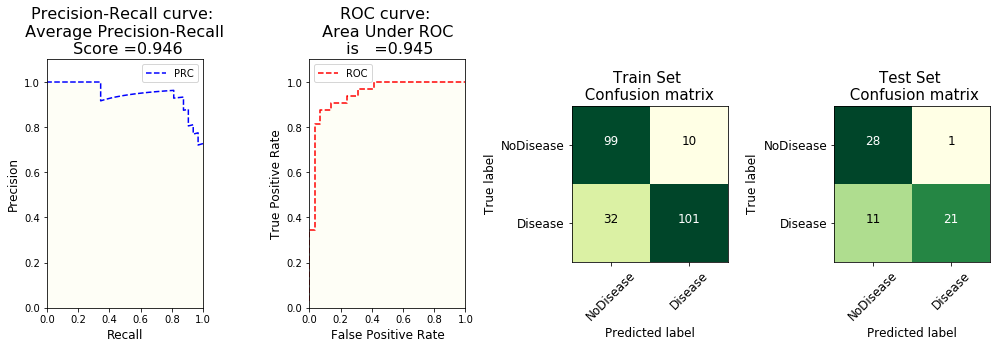

In [11]:
from sklearn.linear_model import SGDClassifier
# SGD Classifier
sgd_clf_params = {"penalty": ['l1', 'l2']}
grid = GridSearchCV(SGDClassifier(loss='log',max_iter=100), 
                    sgd_clf_params, cv=kfold, scoring ='roc_auc')
grid.fit(X_train, y_train)
# SGDClassifier best parameters.
sgd_clf = grid.best_estimator_

gridSearchCVReport()

score_P(sgd_clf,'NoDisease','Disease','SGDClassifier')

Grid Search with ROC AUC

 Train Set 
Best parameters on Train set: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation score (AUC) on Train set: 0.8809984883980656

 Test Set
Test set AUC: 0.9525862068965517
Test set accuracy: 0.8852459016393442

 Scores on Test Set
             precision    recall  f1-score   support

          0       0.87      0.90      0.88        29
          1       0.90      0.88      0.89        32

avg / total       0.89      0.89      0.89        61



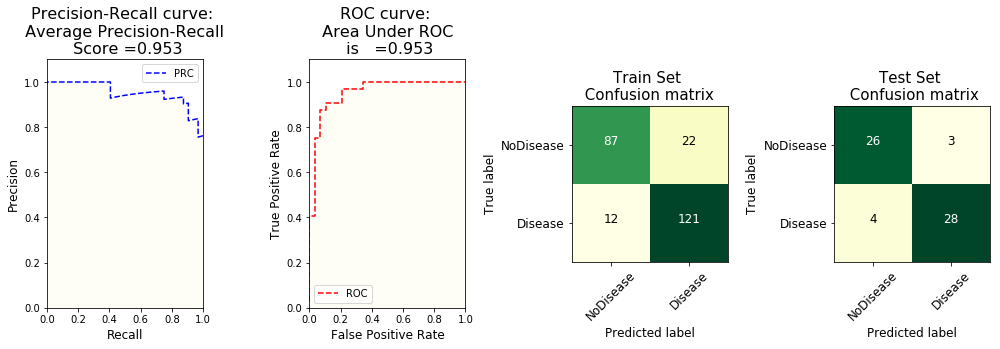

In [12]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Classifier
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=kfold,scoring ='roc_auc')

grid.fit(X_train, y_train)
# Logistic Regression best estimator
log_clf = grid.best_estimator_

gridSearchCVReport()

score_P(log_clf,'NoDisease','Disease','LogisticRegression')

Grid Search with ROC AUC

 Train Set 
Best parameters on Train set: {'algorithm': 'auto', 'n_neighbors': 4}
Best Cross-Validation score (AUC) on Train set: 0.8624880526307587

 Test Set
Test set AUC: 0.9299568965517242
Test set accuracy: 0.8852459016393442

 Scores on Test Set
             precision    recall  f1-score   support

          0       0.87      0.90      0.88        29
          1       0.90      0.88      0.89        32

avg / total       0.89      0.89      0.89        61



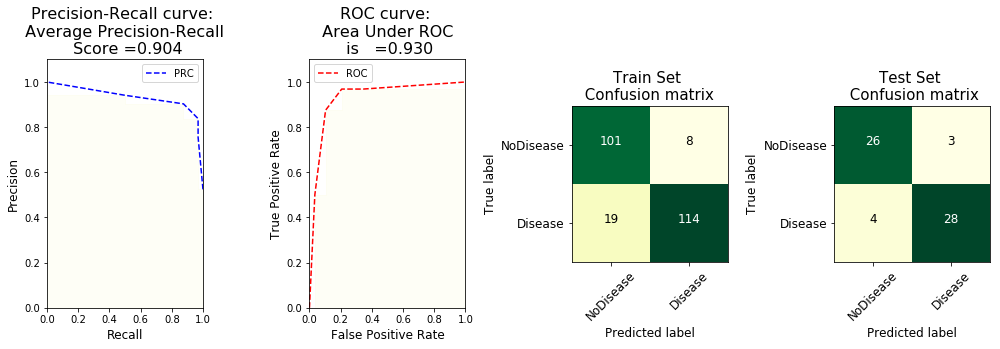

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#K-Nearest Nieghbors Classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(KNeighborsClassifier(), knears_params,cv=kfold, scoring ='roc_auc')

grid.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid.best_estimator_

gridSearchCVReport()

score_P(knears_neighbors,'NoDisease','Disease',knears_neighbors.__class__.__name__)

Grid Search with ROC AUC

 Train Set 
Best parameters on Train set: {'C': 0.9, 'kernel': 'rbf'}
Best Cross-Validation score (AUC) on Train set: 0.8923480995891143

 Test Set
Test set AUC: 0.9321120689655172
Test set accuracy: 0.8524590163934426

 Scores on Test Set
             precision    recall  f1-score   support

          0       0.83      0.86      0.85        29
          1       0.87      0.84      0.86        32

avg / total       0.85      0.85      0.85        61



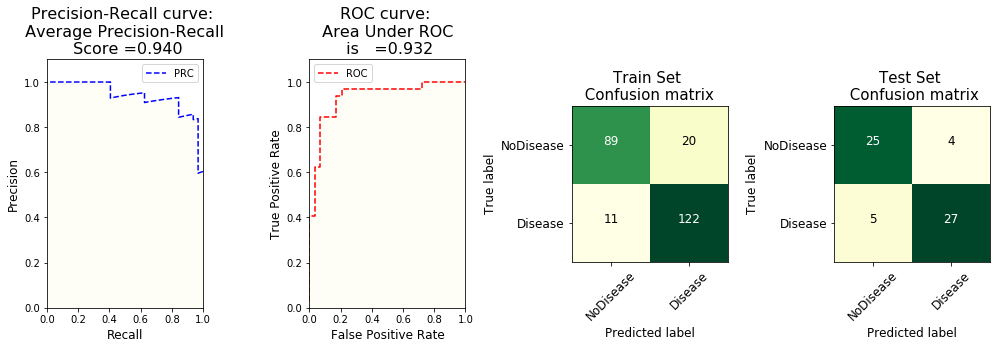

In [14]:
from sklearn.svm import SVC
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(SVC(probability=True), svc_params,cv=kfold, scoring ='roc_auc')

grid.fit(X_train, y_train)
# SVC best estimator
svc_clf = grid.best_estimator_

gridSearchCVReport()

score_P(svc_clf,'NoDisease','Disease',svc_clf.__class__.__name__)

Grid Search with ROC AUC

 Train Set 
Best parameters on Train set: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}
Best Cross-Validation score (AUC) on Train set: 0.831541769041769

 Test Set
Test set AUC: 0.839978448275862
Test set accuracy: 0.7540983606557377

 Scores on Test Set
             precision    recall  f1-score   support

          0       0.75      0.72      0.74        29
          1       0.76      0.78      0.77        32

avg / total       0.75      0.75      0.75        61



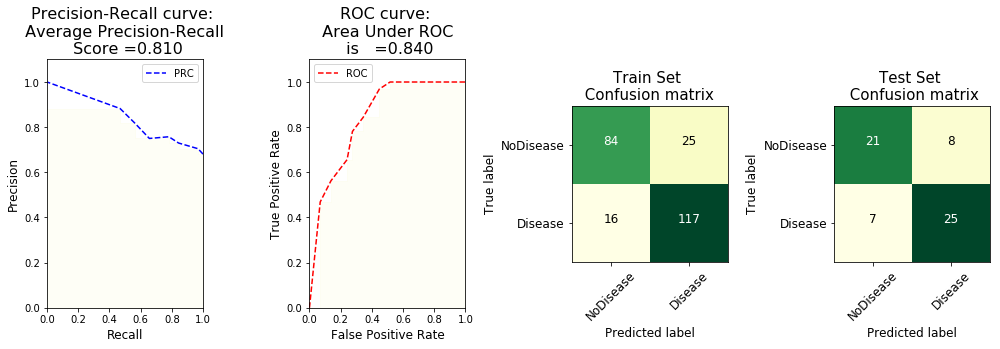

In [15]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid = GridSearchCV(DecisionTreeClassifier(), tree_params,cv=kfold, scoring ='roc_auc')
grid.fit(X_train, y_train)
# tree best estimator
tree_clf = grid.best_estimator_

gridSearchCVReport()

score_P(tree_clf,'NoDisease','Disease','DecisionTreeClassifier')


 Scores on Test Set
             precision    recall  f1-score   support

          0       0.90      0.90      0.90        29
          1       0.91      0.91      0.91        32

avg / total       0.90      0.90      0.90        61



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


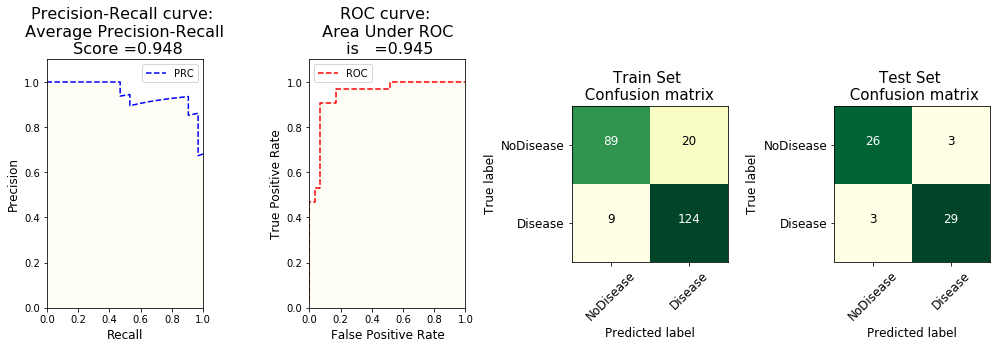

In [16]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('sgd',sgd_clf),('log',log_clf),
                                          ('svc',svc_clf),
                                          ('knn',knears_neighbors)],
                             voting='soft').fit(X_train,y_train)

score_P(voting_clf,'NoDisease','Disease','VotingClassifier')

# Bagging
- Use the same training algorithm for every predictor, but to train them on different random subsets of the trainning set. 
    - **Bagging**: sampling is performed with replacement. <font color='red'> **bootstrap = True** </font>
    - **Pasting**: sampling is performed without replacement. <font color='red'> **bootstrap = False** </font>


 Scores on Test Set
             precision    recall  f1-score   support

          0       0.83      0.83      0.83        29
          1       0.84      0.84      0.84        32

avg / total       0.84      0.84      0.84        61



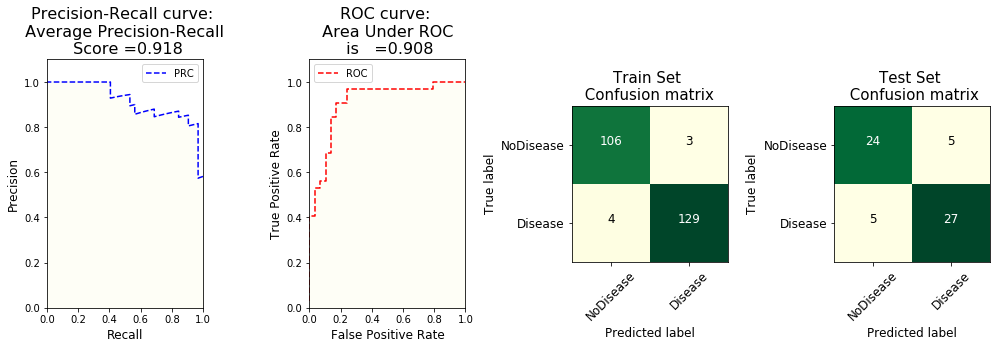

In [17]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 500, 
                            max_samples = 100,
                            bootstrap = True).fit(X_train,y_train)

score_P(bag_clf,'NoDisease','Disease','DecisionTreeClassifier')

# Random Forest
- **Random Forest**  is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting).
- **Feature importance**
    - It is measured how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest).
    - It is a weighted average, where each node's weight is equal to the number of traning samples that are associated with it.
    - The sum of all importances is equal to 1.

Grid Search with ROC AUC

 Train Set 
Best parameters on Train set: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 52}
Best Cross-Validation score (AUC) on Train set: 0.9028981460799643

 Test Set
Test set AUC: 0.9288793103448276
Test set accuracy: 0.8524590163934426

 Scores on Test Set
             precision    recall  f1-score   support

          0       0.86      0.83      0.84        29
          1       0.85      0.88      0.86        32

avg / total       0.85      0.85      0.85        61



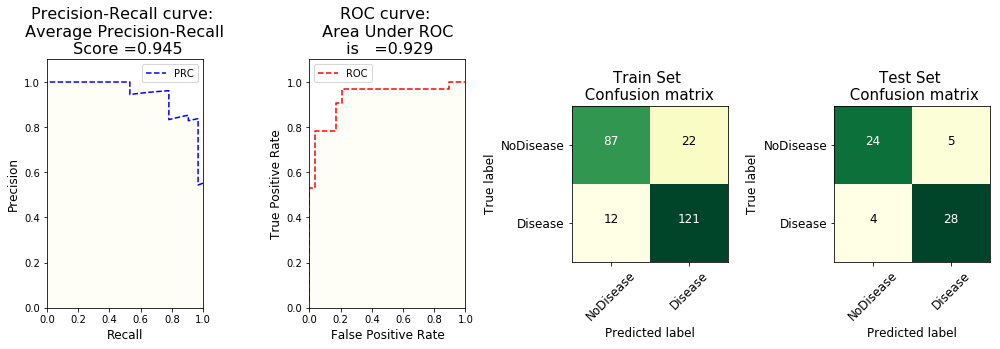

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_params = {"n_estimators": list(range(2,500,50)), 
              "max_depth": list(range(2,10,1)), 
              "criterion": ['gini','entropy']}

grid = GridSearchCV(RandomForestClassifier(), 
                    rnd_params, cv=kfold, 
                    scoring ='roc_auc').fit(X_train, y_train)

rnd_clf = grid.best_estimator_

gridSearchCVReport()

score_P(rnd_clf,'NoDisease','Disease',rnd_clf.__class__.__name__)

In [19]:
rnd_FI = pd.DataFrame()
rnd_FI['feature name'] = X_test.columns
rnd_FI['Score'] = rnd_clf.feature_importances_
rnd_FI.sort_values(by=['Score'],ascending=False,inplace=True)
rnd_FI.head()

,feature name,Score
5,num_major_vessels,0.156522
17,thalassemia_reversable defect,0.146763
3,max_heart_rate,0.145423
4,ST_depression,0.131081
13,exercise_indeced_angina_Yes,0.112828


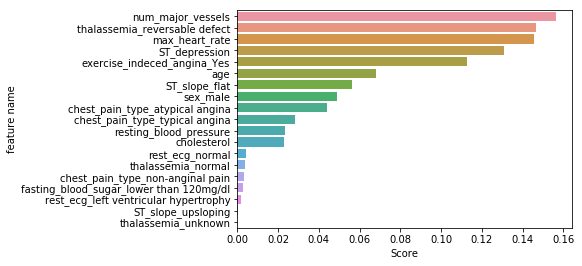

In [20]:
sns.barplot(rnd_FI['Score'],rnd_FI['feature name']);

# XGBClassifier

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
gbm_param_grid = {'learning_rate':[0.4,0.5,0.6],
                  'n_estimators':[400,500,600],
                  'max_depth': [5, 6, 7,8]}

grid = GridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic',random_state=42),  
                    param_grid=gbm_param_grid,
                    scoring='roc_auc',
                    cv=kfold,
                    verbose=100).fit(X_train,y_train)

print("Best parameters found:", grid.best_params_)

xgb_cv_clf = grid.best_estimator_

gridSearchCVReport()

score_P(xgb_cv_clf,'NoDisease','Disease','DecisionTreeClassifier')

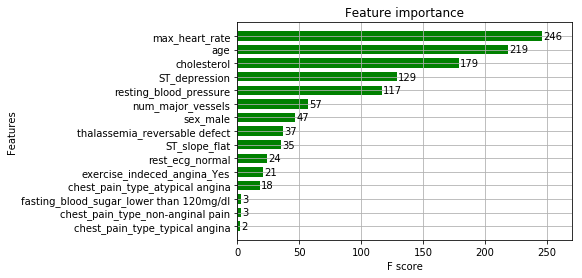

In [23]:
ax = xgb.plot_importance(xgb_cv_clf, height=0.7, xlabel='F score', 
                         importance_type='weight', 
                         max_num_features=20, grid=True, show_values=True,color='green')
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['font.size'] = 13
plt.show()